# Veri Bilimi İçin İstatistik

* **Örnek Teorisi**
* **Betimsel İstatistikler**
* **Güven Aralıkları**
* **Olasılık Dağılımları**
* **Hipotez Testleri**
* **Varyans Analizi**
* **Korelasyon Analizi**

**Without a grounding in statistics, a Data Scientist is a Data Lab Assistant.**

**İstatistik veri biliminin "bilim" makine öğrenmesinin "öğrenme" kısmıdır.**

**The Future of AI Will Be About Less data, Not More.**

**Örneklem**: Bir popülasyonu temsil ettiği düşünülen bir alt küme seçme işlemidir.
Belli kurallara göre seçilir. Yansız olması gerekir.

**Örneklem Dağılımı**: Bir popülasyon içerisinde birden fazla örneklem çekildiğinde, bu örneklemlerin dağılımlarıyla ilgilenilmesidir.

**Merkezi Limit Teoremi**: Bağımsız ve aynı dağılıma sahip rassal değişkenlerin toplamı ya da aritmetik ortalaması yaklaşık olarak normal dağılmaktadır.

## Örnek Teorisi

In [14]:
import numpy as np

In [15]:
populasyon = np.random.randint(0,80,10000)

In [16]:
populasyon[0:10]

array([43, 29, 77, 60, 43, 23, 35, 60, 79, 79])

**Örneklem Çekimi:**

In [21]:
np.random.seed(115)
orneklem = np.random.choice(a = populasyon, size = 100)
orneklem[0:10]

array([77, 59, 58, 38, 77, 71, 73, 17, 16, 71])

In [18]:
orneklem.mean()

39.74

In [19]:
populasyon.mean()

39.6059

**Örneklem Dağılımı:**

In [22]:
np.random.seed(10)
orneklem1 = np.random.choice(a = populasyon, size = 100)
orneklem2 = np.random.choice(a = populasyon, size = 100)
orneklem3 = np.random.choice(a = populasyon, size = 100)
orneklem4 = np.random.choice(a = populasyon, size = 100)
orneklem5 = np.random.choice(a = populasyon, size = 100)
orneklem6 = np.random.choice(a = populasyon, size = 100)
orneklem7 = np.random.choice(a = populasyon, size = 100)
orneklem8 = np.random.choice(a = populasyon, size = 100)
orneklem9 = np.random.choice(a = populasyon, size = 100)
orneklem10 = np.random.choice(a = populasyon, size = 100)

In [23]:
(orneklem1.mean() + orneklem2.mean() + orneklem3.mean() + orneklem4.mean() + orneklem5.mean() 
+ orneklem6.mean() + orneklem7.mean() + orneklem8.mean() + orneklem9.mean() + orneklem10.mean() )  / 10

38.739

In [25]:
orneklem1.mean()

42.06

In [26]:
orneklem2.mean()

37.12

## Betimsel İstatistikler

* Ortalama
* Medyan
* Mod
* Kartiller
* Değişim Aralığı
* Standart Sapma
* Kovaryans
* Korelasyon

**Kovaryans**: İki değişken arasındaki ilişkinin değişkenlik ölçüsüdür.
**_cov(X,Y)=E[(X-E[X])(Y-E[Y])]_**


**Korelasyon**: İki değişken arasındaki ilişkiyi, ilişkinin anlamlı olup olmadığını, ilişkinin şiddetini ve yönünü ifade eden istatiksel bir tekniktir.

In [27]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [29]:
!pip install researchpy
import researchpy as rp

In [35]:
rp.summary_cont(df[["total_bill","tip","size"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [36]:
rp.summary_cat(df[["sex","smoker","day"]])

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79


In [37]:
df[["tip","total_bill"]].cov()

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


In [38]:
df[["tip","total_bill"]].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


## Güven Aralığı

**Güven Aralığı Nedir**: Anakütle parametresinin tahmini değerini kapsayabilecek iki sayıdan oluşan bir aralık bulunmasıdır.
* Ortalama etrafında %95 güvenirlilik ile bu ortalama buradadır.
* Bilimsel anlamda belirli bir yanılma payıyla -ki o %5 oluyor- değerlerin nerede olabileceğini sunmuş oluyor.

**Güven Aralığı Nasıl Hesaplanır?**

* **Adım 1:** n, ortalama ve standart sapmayı bul
* n = 100, ortalama = 180, standart sapma = 40

* **Adım 2:** Güven aralığına karar ver: 95 mi 99 mu?(%95 ön tanımlı olarak kabul edilir.)
* Z tablo değerini hesapla (1,96 - 2,57)

* **Adım 3:** Yukarıdaki değerleri kullanarak güven aralığını hesapla:
* ortalama +- z (s/sqrt(n)) = 180 +- 1,96 * (40/sqrt(100))

* **Sonuç:** 180 +- 7,84 yani 172 ile 188 arasıdır.

# İş Uygulaması: Fiyat Stratejisi Karar Destek Sistemi

* Problem: 
    * CEO fiyat belirleme konusunda bilimsel bir dayanak ve        esneklik     istiyor.
* Detaylar:
   * Satıcı, alıcı ve bir ürün var.
   * Alıcılara ürüne ne kadar ücret öderdiniz diye soruluyor
   * Optimum fiyat bilimsel ve esnek olarak bulunmak isteniyor

In [51]:
import numpy as np
fiyatlar = np.random.randint(10,110, 1000)

In [52]:
fiyatlar.mean()

59.472

In [53]:
import statsmodels.stats.api as sms

In [54]:
sms.DescrStatsW(fiyatlar).tconfint_mean()

(57.66944543697184, 61.27455456302816)

# Bernoulli Dağılımı

**Başarılı-Başarısız, olumlu-olumsuz şeklinde iki sonuçlu olaylar ile ilgilenildiğinde kullanılan kesikli olasılık dağılımıdır.**

${\displaystyle f(k;p)=p^{k}(1-p)^{1-k}\quad {\text{for }}k\in \{0,1\}}$


${\displaystyle \operatorname {E} \left(X\right)=p}$

$\operatorname {Var} [X]=pq=p(1-p)$

In [1]:
from scipy.stats import bernoulli

In [2]:
p = 0.6

In [4]:
rv = bernoulli(p)
rv.pmf(k = 0)

0.4

In [6]:
rv.pmf(k = 1)

0.6

# Büyük Sayılar Yasası

**Bir rassal değişkenin uzun vadeli kararlılığını tanımlayan olasılık teoremidir.**

In [7]:
import numpy as np
rng = np.random.RandomState(123)
for i in np.arange(1,21):
    deney_sayisi = 2**i
    yazi_turalar = rng.randint(0, 2, size = deney_sayisi)
    yazi_olasiliklari = np.mean(yazi_turalar)
    print("Atış Sayısı:",deney_sayisi,"---",'Yazı Olasılığı: %.2f' % (yazi_olasiliklari * 100))

Atış Sayısı: 2 --- Yazı Olasılığı: 50.00
Atış Sayısı: 4 --- Yazı Olasılığı: 0.00
Atış Sayısı: 8 --- Yazı Olasılığı: 62.50
Atış Sayısı: 16 --- Yazı Olasılığı: 43.75
Atış Sayısı: 32 --- Yazı Olasılığı: 46.88
Atış Sayısı: 64 --- Yazı Olasılığı: 56.25
Atış Sayısı: 128 --- Yazı Olasılığı: 50.78
Atış Sayısı: 256 --- Yazı Olasılığı: 52.73
Atış Sayısı: 512 --- Yazı Olasılığı: 52.93
Atış Sayısı: 1024 --- Yazı Olasılığı: 50.20
Atış Sayısı: 2048 --- Yazı Olasılığı: 48.58
Atış Sayısı: 4096 --- Yazı Olasılığı: 49.49
Atış Sayısı: 8192 --- Yazı Olasılığı: 49.58
Atış Sayısı: 16384 --- Yazı Olasılığı: 49.96
Atış Sayısı: 32768 --- Yazı Olasılığı: 50.00
Atış Sayısı: 65536 --- Yazı Olasılığı: 49.68
Atış Sayısı: 131072 --- Yazı Olasılığı: 49.97
Atış Sayısı: 262144 --- Yazı Olasılığı: 50.13
Atış Sayısı: 524288 --- Yazı Olasılığı: 50.01
Atış Sayısı: 1048576 --- Yazı Olasılığı: 50.09


# Binom Dağılımı

**Binom dağılımı, bağımsız n deneme sonucu k başarılı olma olasılığı ile ilgilenildiğinde kullanılan dağılımdır.**

${\displaystyle f(k;n,p)={n \choose k}p^{k}(1-p)^{n-k}}$, k = 0, 1, 2, ...,n


${\displaystyle \operatorname {E} (X)=np}$


${\displaystyle \operatorname {Var} (X)=np(1-p)}$

## İş Uygulaması: Reklam Harcaması Optimizasyonu

* Problem:
      Çeşitli mecralara reklam veriliyor, reklamların tıklanma ve geri dönüşüm oranları optimize edilmeye çalışılıyor. Buna yönelik olarak belirli bir mecrada çeşitli senaryolara göre reklama tıklama olasılıkları hesaplanmak isteniyor.

* Detaylar:
     * Bir mecrada reklam verilecek
     * Dağılım ve reklama tıklama olasılığı biliniyor(0.01)
     * **Soru:** Reklamı 100 kişi gördüğünde 1,5,10 tıklanması olasılığı nedir?

**Sonuç:** 
* f(1;100,0.01) =(100,1)0.01^(2)(1-0.01)^(100-1) = 0.37 
* f(5) = 0.00289779
* f(10) = 0.00000007

In [9]:
from scipy.stats import binom

In [10]:
p = 0.01
n = 100
rv = binom(n , p)
print(rv.pmf(1))
print(rv.pmf(5))
print(rv.pmf(10))

0.36972963764972666
0.002897787123761478
7.006035693977194e-08


# Poisson Dağılımı

**Belirli bir zaman aralığında belirli bir alanda nadiren rastlana olayların olasıklıklarını hesaplamak için kullanılır.**

${\displaystyle f(x,\lambda )={\frac {\lambda ^{x}e^{-\lambda }}{x!}}\,\!}$,  
* x = 0,1,2,...,n
* x = Olayların ortaya çıkma sayısı
* n > 50 , n * p < 5 => Nadir Olay
* Rassal denemeler iki sonuçlu olmalı
* Aynı koşullar altında gerçekleştirilmelidir
* Rasal denemeler birbirinden bağımsız olmalıdır

 * Olaylar:
     * 10 Bin kelimeden oluşan bir kitapta hatalı kelime sayısı
     * 4000 öğrencili okulda not girişinde hata yapılması
     * Bir iş gününde çağrı merkezine gelen taktir sayısı
     * Kredi kartı işlemlerinde sahtekarlık yapılması
     * Rötara düşen uçuş sefer sayısı

## İş Uygulaması: İlan Girişi Hata Olasılıklarının Hesaplanması
* Problem:
    Hatalı İlan girişi olasılıkları hesaplanmak isteniyor.
* Detaylar:
    * Bir yıl süresince ölçümler yapılıyor.
    * Dağılım biliniyor(Poisson) ve Lambda 0.1 (ortalama hata sayısı)
    * Hiç hata olmaması, 3 hata olması ve 5 hata olması olasılıkları nedir?

In [12]:
from scipy.stats import poisson 

In [13]:
lambda_ = 0.1

In [15]:
rv = poisson(mu = lambda_)
print(rv.pmf(k = 0))
print(rv.pmf(k = 3))
print(rv.pmf(k = 5))

0.9048374180359595
0.00015080623633932676
7.54031181696634e-08


# Normal Dağılım

**Normal dağıldığı bilinen sürekli rassal değişkenler için olasılık hesaplanması için kullanılır**

${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$

* $\mu$  ortalama ya da dağılımın beklenen değeri

* ${\displaystyle \sigma }$  standart sapma

* ${\displaystyle \sigma ^{2}}$ varyans

## İş Uygulaması: Ürün Satış Olasılıklarının Hesaplanması

* Problem:
    * Bir Yatırım/toplantı öncesinde gelecek ay ile ilgili satışların  belirli değerlerde gerçekleşmesi olasılıkları belirlenmek isteniyor.
* Detaylar:
    * Dağılımın normal oldupu biliniyor
    * Aylık ortama satış sayısı 80K, standart sapması 5K
    * 90K'dan fazla satış yapma olasılığı nedir?

In [16]:
from scipy.stats import norm

In [21]:
#90'dan fazla olması
1-norm.cdf(90,80,5)

0.02275013194817921

In [22]:
#70'den fazla olması
1 - norm.cdf(70,80,5)

0.9772498680518208

In [24]:
#73'den az olması
norm.cdf(73,80,5)

0.08075665923377107

In [25]:
#85 ile 90 arasında olması
norm.cdf(90,80,5)-norm.cdf(85,80,5)

0.13590512198327787

## 1. Belirsizlik altında karar vermeye çalışmak 
## 2. Uygun olasılık fonksiyonları ile olasılık hesapları yapıyoruz.

# Hipotez Testi Nedir?

* **Bi inanışı(bir savı, bir tahmini vs)test etmek için kullanılan istatiksel bir tekniktir.**

* **Hipotez testleri şans eseri ortaya çıkma durumunu da göz önünde bulundurarak şansa yer vermeyecek şekilde bize ilgilenmiş olduğumuz konuda bir ispat etme imkanı sağlar**

## Hipotezler ve Türleri

* Hipotezler 
    * <d><i>H</i><sub>0</sub>: <i>μ</i> = <i>50</i></d>
    * <d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>50</i></d><br><br> olarak ikiye ayrılır
* 0 hipotezi ve alternatif hipotez de denebilir.

<d><i>H</i><sub>0</sub>: <i>μ</i> <= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> > <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> >= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> < <i>50</i></d><br><br>

## Hata Tespiti

* Gerçekte  <d><i>H</i><sub>0</sub> doğru ve reddedilmedi -> Doğru Karar (1- alpha = Güven Düzeyi)
* Gerçekte  <d><i>H</i><sub>0</sub> yanlış ve reddedilmedi -> 2. Tip Hata (Beta Hatası)
* Gerçekte  <d><i>H</i><sub>0</sub> doğru ve reddedildi -> 1. Tip Hata (Alpha Hatası)
* Gerçekte  <d><i>H</i><sub>0</sub> yanlış ve reddedildi -> Doğru Karar (1- beta = Testin Gücü)

**P-Value:**
* p < 0.05
* Hipotez testlerinin sonuçlarını değerlendirmek üzere programlar tarafından p_value değeri verilir. BU değer üzerinden kolayca yorum yapabiliriz.
* Alpha = 0.05

**Dağılım testlerinde H0 reddedilmek istenilmez. Çünkü H0 "örnek dağılımı ile teorik dağılım arasında fark yoktur" der.**

# Hipotez Testi Adımları

* **Adım 1:** Hipotezlerin kurulması ve yönlerinin berlirlenmesi
* **Adım 2:** Anlamlılık düzeyinin ve tablo değerinin belirlenmesi
* **Adım 3:** Test istatistiğinin belirlenmesi ve test istatistiğinin hesaplanması
* **Adım 4:** Hesaplanan test istatistiği ile alfa'ya karşılık gelen tablo değerinin karşılaştırılması.
    * Test İstatistiği(Zh) > Tablo Değeri (Zt) ise H0 Red
* **Adım 5:** Yorum

# Tek Örneklem T Testi

Popülasyon ortalaması ile varsayımsal bir değer arasında istatiksel olarak anlamlı bir farklılık olup olmadığını test etmek için kullanılan parametrik bir testtir.

Örnek ortalamasına ilişkin test yapmak için kullanılır.

**Hipotezler:**

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>50</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> <= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> > <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> >= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> < <i>50</i></d><br><br>




<table></table>

**Test İstatistiği:**

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{\frac {s}{\sqrt {n}}}}}$

* 1. Anakütle standart sapması biliniyorsa z istatistiği kullanılır.
* 2. Anakütle standart sapması bilinmiyorsa ve n > 30 ise z istatistiği kullanılır.
* 3. Anakütle standart sapması bilinmiyor ve n < 30 ise t istatistiği kullanılır.
* n büyüdükçe t, z'ye yaklaşır

# İş Uygulaması: Ürün Satın Alma Adım Optimizasyonu

* Problem:
    * Sepete ürün ekleme işlemi sonrasında ödeme ekranında 5 adım vardır ve bu adımların birisi sorgulanmaktadır.
* Detaylar:
    * Her adımın 20'şer sn. olması hedefi var. 4. adım sorgulanıyor.
    * Bu durumu test etmek için 100 örnek alınıyor.
    * Örnek standart sapması 5 saniyedir. Örnek ortalaması ise 19 saniyedir.

* Standart sapmasını göz önünde bulundurarak istatistiki olarak anlamlı olup olmadığını değerlendirmiş olucaz.

## Adımlar:
* Adım 1: Hipotezlerin kurulması ve yönlerinin belirlenmesi

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>20</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>20</i></d><br><br>

* Adım 2: Anlamlılık düzeyinin ve tablo değerinin belirlenmesi
    * Alfa = 0,05 Alfa/2 = 0,025 (Alfa = Kabul edilebilir hata miktarı) 
    * Kurmuş olduğumuz hipotez iki yanlı olduğu için alfayı ikiye bölüyoruz
    * Ztablo olasılık değeri: 0,5 - 0,025 = 0,475
    * Ztablo kritik değer = -/+ 1,96
* Adım 3: Test istatistiğinin belirlenmesi ve test istatistiğinin hesaplanması
    * n = 100
    * Standart Sapma = 5
    * Örnek Ortalaması 19 sn
    * zhesap = (19-20)/5/sqrt(100)= -2,00
* Adım 4: Ztablo ve Zhesap karşılaştırması Zh > Zt ya da -Zh < -Zt ise H0 Red
    * Zhesap = -2,00 < Ztablo = -1,96 olduğu için H0 reddedilir.(Zhesap negatif bir değer ise Ztablo da negatif alınır)
* Adım 5: Yorum
    * 4. adımda geçirilen sürenin 20 saniye olduğu iddia eden H0 hipotezi reddedilmiştir. Buna göre kullanıcılar istatiksel olarak yüzde 95 güvenilirlik ile 4. adımda 20 saniyeden farklı zaman geçirmektedir.

# İş Uygulaması: Web Sitesinde Geçirilen Sürenin Testi

* Problem:
    * Web sitemizde geçirilen ortalama süre gerçekten 170 saniye mi?
* Detaylar
    * Yazılımlardan elde edilen web sitesinde geçirilen ort. süreler var.
    * Bu veriler incelendiğinde bir yönetici ya da çalışanımız bu değerlerin böyle olmadığına yönelik düşünceler taşıyor ve bu durumu test etmek istiyorlar.

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>170</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>170</i></d><br><br>


In [3]:
import numpy as np

olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [4]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [5]:
import scipy.stats as stats

In [6]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

* Varsayımlar
* Normallik varsayımı

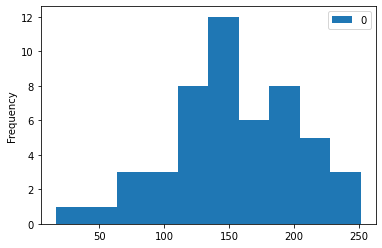

In [7]:
#histogram
import pandas as pd
pd.DataFrame(olcumler).plot.hist();

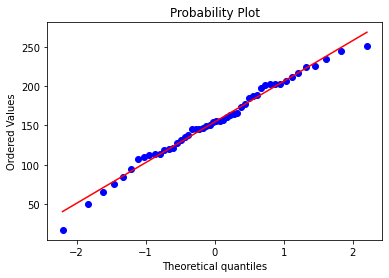

In [8]:
#qqplot
import pylab 
stats.probplot(olcumler, dist = "norm", plot = pylab)
pylab.show()

**Shapiro-Wilks Testi**

H0: Örnek dağılımı ile teorik normal dağılım arasında istatiksel olarak anlamlı bir fark yoktur.

H1: ... fark vardır

In [9]:
from scipy.stats import shapiro 

In [10]:
shapiro(olcumler)

ShapiroResult(statistic=0.9853105545043945, pvalue=0.7848747968673706)

In [11]:
print("T Hesap İstatistiği: " + str(shapiro(olcumler)[0]))
print("Hesaplanan P-value: " + str(shapiro(olcumler)[1]))

T Hesap İstatistiği: 0.9853105545043945
Hesaplanan P-value: 0.7848747968673706


In [12]:
#Hipotez Testinin Uygulanması

In [13]:
stats.ttest_1samp(olcumler, popmean = 170)

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

H0: Web sitemizde geçirilen ortalama süre 170tir.
H1: .. değildir.

## Nonparametrik Tek Örneklem Testi

In [16]:
from statsmodels.stats.descriptivestats import sign_test

In [17]:
sign_test(olcumler, 170)

(-7.0, 0.06490864707227217)

# Tek Örneklem Oran Testi

Oransal bir ifade test edilmek istenildiğinde kullanılır.

## İş uygulaması:Dönüşüm Oranı Testi

* Problem:
    * Bir yazılım ile bir mecrada reklam verilmiş ve bu reklama ilişkin yazılım tarafından 0.125 dönüşüm oranı elde edildiği ifade edilmiş. Fakat bu durum kontrol edilmek isteniyor. Çünkü bu yüksek bir oran ve gelirler incelendiğinde örtüşmüyor.
* Detaylar:
    * 500 kişi dış mecrada reklamlara tıklamış, 40 tanesi sitemize gelip alışveriş yapmış
    * Örnek üzerinden elde edilen dönüşüm oranı: 40/500 = 0,08

HO: p = 0.125 

H1: p != 0.125

In [20]:
from statsmodels.stats.proportion import proportions_ztest

In [21]:
count = 40
nobs = 500
value = 0.125

In [22]:
proportions_ztest(count,nobs,value)

(-3.7090151628513017, 0.0002080669689845979)

P value değerine bakarak 0.125lik dönüşüm oranının yanlış olduğu bilgisine erişiyoruz(%5 yanılma payı ile)

# Bağımsız İki Örneklem T Testi (AB Testi)

**İki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.**

* Normallik
* Varyans homojenliği

## İş uygulaması: ML Modelinin Başarı Testi(AB Testi)

* Problem:
    * Bir ML projesine yatırım yapılmış. Ürettiği tahminler neticesinde oluşan gelir ile eski sistemiin ürettiği gelirler karşılaştırılıp anlamlı farklılık olup olmadığı test edilmek isteniyor.
* Detaylar:
    * Model geliştirilmiş ve web sitesine entegre edilmiş.
    * Site kullanıcıları belirli bir kurala göre ikiye bölünmüş olsun.
    * A grubu eski B grubu yeni sistem.
    * Gelir anlamında anlamlı bir iş yapılıp yapılmadığı test edilmek isteniyor.

### Veri Tipi 1

In [23]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


### Veri Tipi 2

In [26]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])
#A ve A'nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

#B ve B'nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

#Tum veri
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


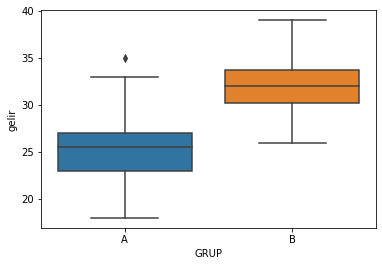

In [27]:
import seaborn as sns
sns.boxplot(x = "GRUP", y = "gelir", data = AB);

## Varsayım Kontrolü

In [28]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [29]:
AB.head()

,gelir,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


### Normallik Varsayımı

In [31]:
from scipy.stats import shapiro

In [32]:
shapiro(A_B.A)

ShapiroResult(statistic=0.9789242148399353, pvalue=0.7962799668312073)

In [33]:
shapiro(A_B.B)

ShapiroResult(statistic=0.9561261534690857, pvalue=0.2458445429801941)

### Varyans Homojenliği Varsayımı

H0: Varyanslar Homojendir.

H1: Varyanslar Homojen Değildir.

In [34]:
stats.levene(A_B.A,A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

## Hipotez Testi 

In [35]:
stats.ttest_ind(A_B["A"],A_B["B"], equal_var = True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [37]:
test_istatistigi, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = -7.0287, p-değeri = 0.0000


## Nonparametrik Bağımsız İki Örneklem Testi

In [38]:
stats.mannwhitneyu(A_B["A"],A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=9.557950378612535e-08)

In [40]:
test_istatistigi, pvalue = stats.mannwhitneyu(A_B["A"], A_B["B"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 89.5000, p-değeri = 0.0000


# Bağımlı İki Örneklem T Testi

Bağımlı iki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.

* Normallik
* Varyans Homojenliği

## İş Uygulaması: Şirket İçi Eğitimin Performans Etkisi Ölçümü

* Problem:
    * Belirli uğraşlar sonucunda alınan bir eğitimin katma değer sağlayıp sağlamadığı ölçülmek isteniyor.
* Detaylar:
    * Bir departman bir konuda eğitim talep ediyor.
    * Gerekli/Gereksiz değerlendirmeleri neticesinde eğitim alınıyor.
    * Eğitimden önce ve sonra olcak şekildegerekli ölçümler yapılıyor
    * Eğitim sonrasında eğitimin sağladığı katma değer test edilmek isteniyor.

H0: MÖ = MS

H1: MÖ != MS

In [43]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [44]:
oncesi[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [46]:
sonrasi[0:5]

,0
0,118
1,127
2,122
3,132
4,129


In [47]:
#BIRINCI VERI SETI
AYRIK = pd.concat([oncesi, sonrasi], axis = 1)
AYRIK.columns = ["ONCESI","SONRASI"]
print("'AYRIK' Veri Seti: \n\n ", AYRIK.head(), "\n\n")


#IKINCI VERI SETI
#ONCESI FLAG/TAG'INI OLUSTURMA
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"
#FLAG VE ONCESI DEGERLERINI BIR ARAYA GETIRME
A = pd.concat([oncesi, GRUP_ONCESI], axis = 1)
#SONRASI FLAG/TAG'INI OLUSTURMA
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

#FLAG VE SONRASI DEGERLERINI BIR ARAYA GETIRME
B = pd.concat([sonrasi, GRUP_SONRASI], axis = 1)

#TUM VERIYI BIR ARAYA GETIRME
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

#ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS","ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), "\n")

'AYRIK' Veri Seti: 

     ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 


'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



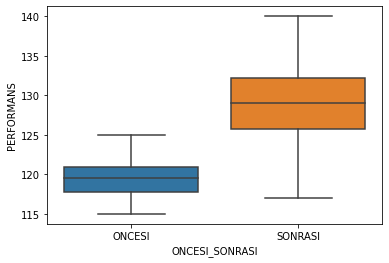

In [49]:
sns.boxplot(x = "ONCESI_SONRASI",y = "PERFORMANS",data = BIRLIKTE);

## Varsayım Kontrolleri

In [50]:
from scipy.stats import shapiro

In [52]:
shapiro(AYRIK.ONCESI)

ShapiroResult(statistic=0.9543654918670654, pvalue=0.10722342133522034)

In [53]:
shapiro(AYRIK.SONRASI)

ShapiroResult(statistic=0.9780087471008301, pvalue=0.6159457564353943)

In [56]:
import scipy.stats as stats
stats.levene(AYRIK.ONCESI, AYRIK.SONRASI)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

## Hipotez Testi

In [57]:
stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

In [67]:
test_istatistigi, pvalue = stats.ttest_rel(AYRIK["ONCESI"], AYRIK["SONRASI"])
print('Test İstatistiği = %.5f, p-değeri = %.5f' % (test_istatistigi, pvalue))

Test İstatistiği = -9.28153, p-değeri = 0.00000


# Nonparametrik Bağımlı İki Örneklem Testi

In [68]:
stats.wilcoxon(AYRIK.ONCESI, AYRIK.SONRASI)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [69]:
test_istatistigi, pvalue = stats.wilcoxon(AYRIK["ONCESI"], AYRIK["SONRASI"])
print('Test İstatistiği = %.5f, p-değeri = %.5f' % (test_istatistigi, pvalue))

Test İstatistiği = 15.00000, p-değeri = 0.00000


# İki Örneklem Oran Testi

İki oran arasında karşılaştımra yapmak için kullanılır

n1 > 30

n2 > 30

# İş Uygulaması: Kullanıcı Arayüzü Deneyi(AB Testi)

* Problem
    * Kırmızı Buton mu Yeşil Buton Mu?
    * H0: P1 <= P2
    * H1: P1 > P2
* Detaylar:
    * Yeşil Buton: 1000 Görüntülenme 300 Tıklama
    * Kırmızı Buton: 1100 Görüntülenme 250 Tıklama

In [72]:
from statsmodels.stats.proportion import proportions_ztest

In [73]:
import numpy as np

In [74]:
basari_sayisi = np.array([300,250])
gozlem_sayilari = np.array([1000,1100])

In [75]:
proportions_ztest(count = basari_sayisi, nobs = gozlem_sayilari)

(3.7857863233209255, 0.0001532232957772221)

# Varyans Analizi

İki ya da daha fazla grup ortalaması arasında istatiksel olarak anlamlı farklılık olup olmadığını öğrenilmek istenildiğinde kullanılır.

H0: M1 = M2 = M3

H1: Eşit Değillerdir(En az birisi farklıdır)

Fs = MS(between)/MS(within)

* Varsayımlar
    * Gözlemlerin birbirinden bağımsız olması(grupların)
    * Normal Dağılım
    * Varyans Homojenliği

## İş Uygulaması: Anasayfa İçerik Stratejisi Belirlemek

* Problem:
    * Anasayfa'da geçirilen süre artırılmak isteniyor.
* Detaylar:
    * Bir web sitesi için başarı kriterleri: ortalama ziyaret süresi, hemen çıkış oranı vb
    * Uzun zaman geçirenkullanıcıların reklamlara daha fazla tıkladığı ve markaya olan bağlılıklarının arttığı biliniyor.
    * Buna yönelik olarak benzer haberler farklı resimler ya da farklı formatlarda hazırlanarak oluşturulan test gruplarına gösteriliyor.
    * A: Doğal Şekilde, B: Yönlendirici, C: İlgi Çekici

In [21]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

dfs = [A, B, C]

ABC = pd.concat(dfs, axis = 1)
ABC.columns = ["GRUP_A","GRUP_B","GRUP_C"]
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


### Varsayım Kontrolü

In [22]:
from scipy.stats import shapiro

In [24]:
shapiro(ABC["GRUP_A"])

ShapiroResult(statistic=0.9697431921958923, pvalue=0.5321715474128723)

In [28]:
shapiro(ABC["GRUP_B"])

ShapiroResult(statistic=0.9789854884147644, pvalue=0.7979801297187805)

In [27]:
shapiro(ABC["GRUP_C"])

ShapiroResult(statistic=0.9579201340675354, pvalue=0.273820161819458)

In [29]:
stats.levene(ABC["GRUP_A"],ABC["GRUP_B"], ABC["GRUP_C"])

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

## Hipotez Testi

In [30]:
from scipy.stats import f_oneway

In [31]:
f_oneway(ABC["GRUP_A"],ABC["GRUP_B"], ABC["GRUP_C"])

F_onewayResult(statistic=74.69278140730431, pvalue=1.3079050746811477e-19)

In [34]:
print("p-value değeri: " + '{:.5f}'.format(f_oneway(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])[1]))

p-value değeri: 0.00000


In [37]:
print("İstatistik değeri: "+ '{:.5f}'.format(f_oneway(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])[0]))

İstatistik değeri: 74.69278


In [38]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GRUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GRUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GRUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


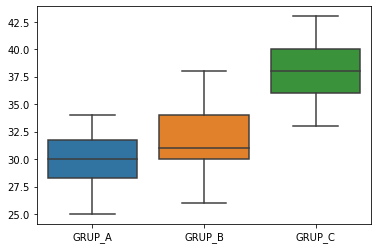

In [42]:
import seaborn as sns
sns.boxplot(data = ABC);

## Nonparametrik Hipotez Testi

In [43]:
from scipy.stats import kruskal

In [46]:
kruskal(ABC["GRUP_A"],ABC["GRUP_B"], ABC["GRUP_C"])

KruskalResult(statistic=54.19819735523783, pvalue=1.7022015426175926e-12)

In [45]:
test_istatistigi, pvalue = stats.kruskal(ABC["GRUP_A"],ABC["GRUP_B"], ABC["GRUP_C"])
print('Test İstatistiği = %.5f, p-değeri = %.5f' % (test_istatistigi, pvalue))

Test İstatistiği = 54.19820, p-değeri = 0.00000


# Korelasyon Analizi

* Değişkenler arasındaki ilişki, bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlayan istatistiksel bir yöntemdir.

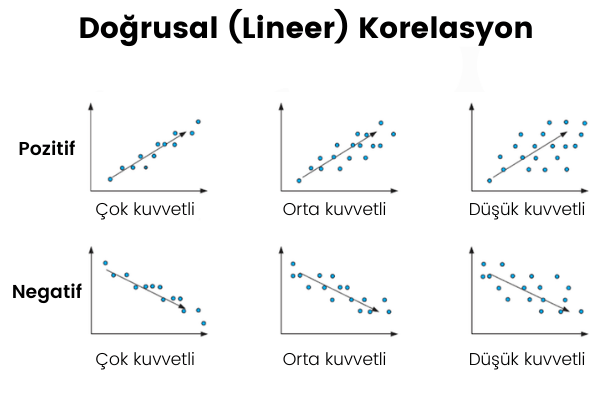

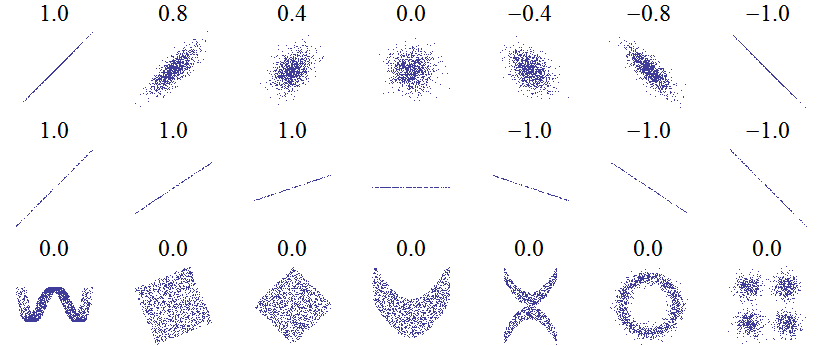

**Korelasyonun Anlamlılığı Testi:**

H0: p = 0

H1: p != 0

**Test İstatistiği:**

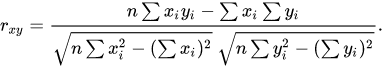

**Varsayımlar**
* İki değişken içinde normallik varsayımı
* Varsayım sağlanıyorsa Pearson Korelasyon Katsayısı
* Varsayım sağlanmıyorsa Spearman Korelasyon Katsayısı

## İş Uygulaması: Bahşiş ile Hesap Arasındaki İlişkinin İncelenmesi 

H0: p = 0

H1: p != 0

**Bahşiş veri seti:**

* total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

* tip: bahşiş

* sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

* smoker: grupta sigara içen var mı? (0=No, 1=Yes)

* day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

* time: ne zaman? (0=Day, 1=Night)

* size: grupta kaç kişi var?

In [48]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
df["total_bill"] = df["total_bill"] - df["tip"]

In [54]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


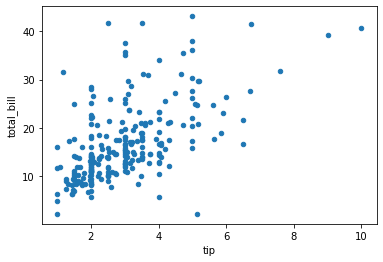

In [56]:
df.plot.scatter("tip","total_bill");

## Varsayım Kontrolü

In [57]:
from scipy.stats import shapiro

In [58]:
test_istatistigi, pvalue = shapiro(df["tip"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

test_istatistigi, pvalue = shapiro(df["total_bill"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 0.8978, p-değeri = 0.0000
Test İstatistiği = 0.9136, p-değeri = 0.0000


## Hipotez Testi

### Korelasyon Katsayısı

In [60]:
df["tip"].corr(df["total_bill"])

0.5766634471096381

In [61]:
df["tip"].corr(df["total_bill"], method = "spearman")

0.593691939408997

### Korelasyonunu Anlamlılığının Testi

In [62]:
from scipy.stats.stats import pearsonr

In [63]:
test_istatistigi, pvalue = pearsonr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.5767, p-değeri = 0.0000


### Nonparametrik Hipotez Testi

In [65]:
from scipy.stats import stats

In [67]:
stats.spearmanr(df["tip"],df["total_bill"])

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

In [76]:
test_istatistigi, pvalue = stats.spearmanr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.5937, p-değeri = 0.0000


In [77]:
test_istatistigi, pvalue = stats.kendalltau(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.4401, p-değeri = 0.0000
